In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df=df.dropna()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['FUEL'] = encoder.fit_transform(df['FUEL'])

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,criterion='entropy', random_state=5)
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)

In [6]:
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
c=accuracy_score(y_test,ypred)
print("Accuracy:",c)

Accuracy: 0.9486959014044138


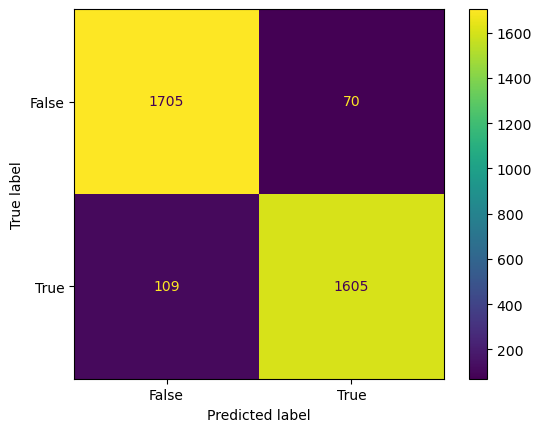

In [8]:
cm =confusion_matrix(y_test, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [9]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1775
           1       0.96      0.94      0.95      1714

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489



In [10]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [12]:
f=pd.Series(clf.feature_importances_,index=list(df.columns[0:6])).sort_values(ascending = False) 

In [13]:
f

AIRFLOW      0.450255
DISTANCE     0.217174
FREQUENCY    0.148744
SIZE         0.089687
DESIBEL      0.058547
FUEL         0.035593
dtype: float64